In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
plastic=pd.read_csv('PlasticSales.csv')
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [3]:
plastic.shape

(60, 2)

In [4]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

plastic['Month'][0]
p=plastic['Month'][0]
p
p[0:3]

plastic['month']=0

for i in range(60):
    p=plastic['Month'][i]
    plastic['month'][i]=p[0:3]
    
month_dummies= pd.DataFrame(pd.get_dummies(plastic['month']))

Plastic_Sales=pd.concat((plastic,month_dummies),axis=1)



Plastic_Sales['t']=np.arange(1,61)

Plastic_Sales['t_square']=Plastic_Sales['t']*Plastic_Sales['t']



Plastic_Sales['log_Sales']=np.log(Plastic_Sales['Sales'])



<ipython-input-4-d1b77e6b4889>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastic['month'][i]=p[0:3]
C:\Users\Aswathy\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<AxesSubplot:>

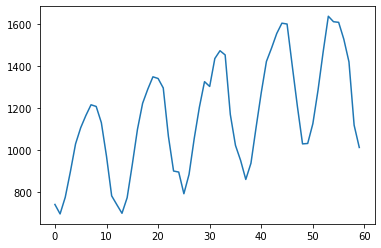

In [5]:
# Split into train & test data
train=Plastic_Sales.head(48)
test=Plastic_Sales.tail(12)

Plastic_Sales.Sales.plot()

In [6]:
Plastic_Sales

,Month,Sales,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314
5,Jun-49,1107,Jun,0,0,0,0,0,0,1,0,0,0,0,0,6,36,7.009409
6,Jul-49,1165,Jul,0,0,0,0,0,1,0,0,0,0,0,0,7,49,7.060476
7,Aug-49,1216,Aug,0,1,0,0,0,0,0,0,0,0,0,0,8,64,7.103322
8,Sep-49,1208,Sep,0,0,0,0,0,0,0,0,0,0,0,1,9,81,7.096721
9,Oct-49,1131,Oct,0,0,0,0,0,0,0,0,0,0,1,0,10,100,7.030857


# Model Building

In [7]:
import statsmodels.formula.api as smf
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing,Holt

In [8]:
# LINEAR MODEL
linear_model= smf.ols('Sales~t',data=train).fit()
linear_model
predlinear= pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_lin= np.sqrt(np.mean((np.array(test['Sales'])-np.array(predlinear))**2))
rmse_lin

260.9378142511123

In [9]:
# QUADRATIC MODEL

quad_model=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad_model.predict(pd.DataFrame(test[['t','t_square']])))
predquad

rmse_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmse_quad 

297.40670972718397

In [10]:
# EXPONENTIAL MODEL 

exp_model=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(exp_model.predict(pd.DataFrame(test['t'])))
rmse_exp= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmse_exp

268.6938385002598

In [11]:
# ADDITIVE SEASONALITY 

add_sea=smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_addsea=pd.Series(add_sea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmse_add= np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_addsea))**2))
rmse_add

235.60267356646528

In [12]:
# ADDITIVE SEASONALITY WITH LINEAR TREND 

add_sealin=smf.ols('Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddlin=pd.Series(add_sealin.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmseaddlin= np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlin))**2))
rmseaddlin

135.55359583482146

In [13]:
# ADDITIVE SEASONALITY WITH QUADRATIC TREND 


add_seaquad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predaddquad= pd.Series(add_seaquad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmseaddquad= np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

218.19387584888918

In [14]:
# MULTIPLICATIVE SEASONALITY 

mul_lin= smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmul=pd.Series(mul_lin.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmsemul=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul 

239.65432143121078

In [15]:
# MULTIPLICATIVE SEASONALITY WITH LINEAR TREND 

mul_add= smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmuladd= pd.Series(mul_add.predict(test[['t','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmsemuladd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmuladd)))**2))
rmsemuladd 

160.68332947193696

In [16]:
# MULTIPLICATIVE SEASONALITY WITH QUADRATIC TREND

mul_quad = smf.ols('log_Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
predmulquad= pd.Series(mul_add.predict(test[['t','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmsemulquad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmulquad)))**2))
rmsemulquad

160.68332947193696

In [17]:
#TABULAR FORM OF RMSE
data={'MODEL': pd.Series(['rmse_add','rmse_exp','rmse_lin','rmse_quad','rmseaddlin','rmseaddquad','rmsemul','rmsemuladd','rmsemulquad']), 'ERROR_VALUES':pd.Series([rmse_add,rmse_exp,rmse_lin,rmse_quad,rmseaddlin,rmseaddquad,rmsemul,rmsemuladd,rmsemulquad])}
table_rmse= pd.DataFrame(data)
table_rmse.sort_values('ERROR_VALUES')

,MODEL,ERROR_VALUES
4,rmseaddlin,135.553596
7,rmsemuladd,160.683329
8,rmsemulquad,160.683329
5,rmseaddquad,218.193876
0,rmse_add,235.602674
6,rmsemul,239.654321
2,rmse_lin,260.937814
1,rmse_exp,268.693839
3,rmse_quad,297.406710


#### ADDITIVE SEASONALITY WITH LINEAR TREND have the least mean squared error

In [18]:
# FINAL model is 
finalmodel =smf.ols('Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Plastic_Sales).fit()
predictfinal=pd.Series(finalmodel.predict(Plastic_Sales))
predictfinal

0      688.566667
1      633.166667
2      716.366667
3      872.366667
4     1031.566667
5     1159.566667
6     1187.566667
7     1249.366667
8     1247.366667
9     1196.566667
10     962.366667
11     802.366667
12     780.283333
13     724.883333
14     808.083333
15     964.083333
16    1123.283333
17    1251.283333
18    1279.283333
19    1341.083333
20    1339.083333
21    1288.283333
22    1054.083333
23     894.083333
24     872.000000
25     816.600000
26     899.800000
27    1055.800000
28    1215.000000
29    1343.000000
30    1371.000000
31    1432.800000
32    1430.800000
33    1380.000000
34    1145.800000
35     985.800000
36     963.716667
37     908.316667
38     991.516667
39    1147.516667
40    1306.716667
41    1434.716667
42    1462.716667
43    1524.516667
44    1522.516667
45    1471.716667
46    1237.516667
47    1077.516667
48    1055.433333
49    1000.033333
50    1083.233333
51    1239.233333
52    1398.433333
53    1526.433333
54    1554.433333
55    1616

## DATA DRIVEN MODEL

In [19]:
plastic["Date"] = pd.to_datetime(plastic.Month,format="%b-%y")
plastic.head()

,Month,Sales,month,Date
0,Jan-49,742,Jan,2049-01-01
1,Feb-49,697,Feb,2049-02-01
2,Mar-49,776,Mar,2049-03-01
3,Apr-49,898,Apr,2049-04-01
4,May-49,1030,May,2049-05-01


In [20]:
plastic["month"] = plastic.Date.dt.strftime("%b")
plastic["year"] =plastic.Date.dt.strftime("%Y")
plastic.head()

,Month,Sales,month,Date,year
0,Jan-49,742,Jan,2049-01-01,2049
1,Feb-49,697,Feb,2049-02-01,2049
2,Mar-49,776,Mar,2049-03-01,2049
3,Apr-49,898,Apr,2049-04-01,2049
4,May-49,1030,May,2049-05-01,2049


### Some EDA on Time series data

<AxesSubplot:xlabel='month', ylabel='year'>

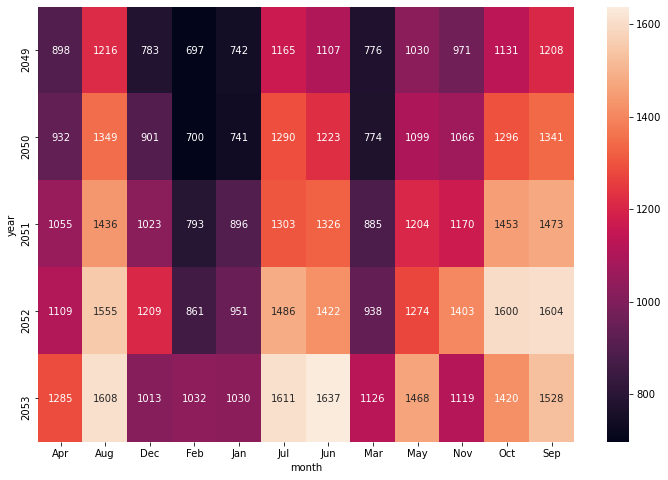

In [21]:
# Heat map visualization 
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=plastic,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Sales'>

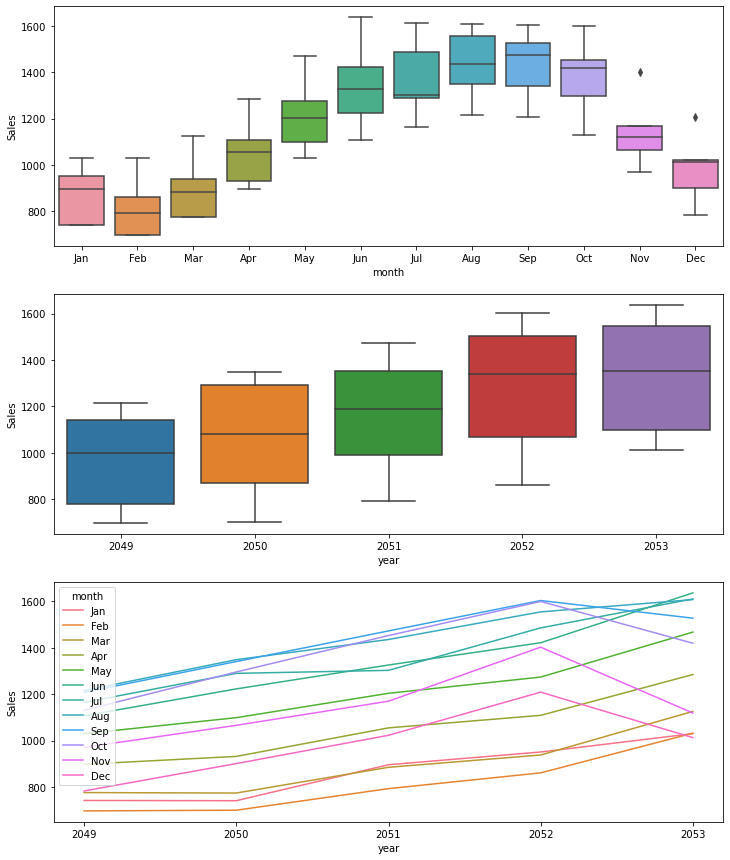

In [22]:
plt.figure(figsize=(12,15))
plt.subplot(311)
sns.boxplot(x="month",y="Sales",data=plastic)
plt.subplot(312)
sns.boxplot(x="year",y="Sales",data=plastic)
plt.subplot(313)
sns.lineplot(x="year",y="Sales",hue="month",data=plastic)

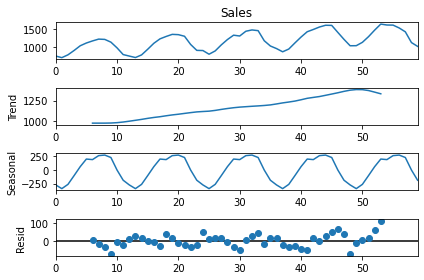

In [23]:
# Seasonal Decompose Plot
from statsmodels.tsa.seasonal import seasonal_decompose
plastic_sea_plot=seasonal_decompose(plastic.Sales,period=12)
plastic_sea_plot.plot()
plt.show()

### Moving Average

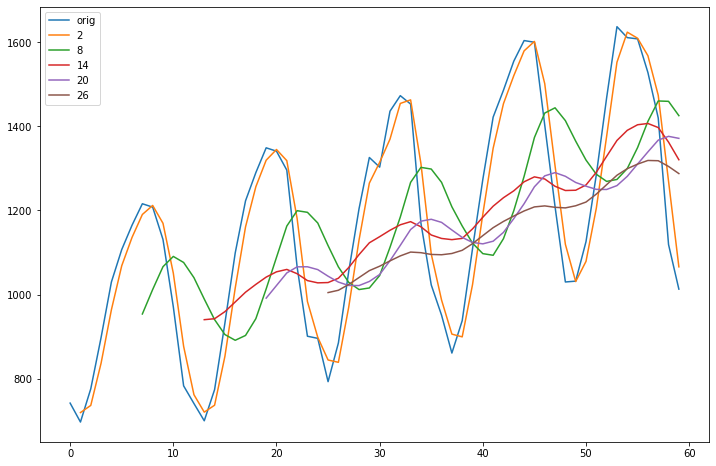

In [24]:
plt.figure(figsize=(12,8))
plastic.Sales.plot(label='orig')
for i in range(2,30,6):
    plastic.Sales.rolling(i).mean().plot(label=str(i))
    
    plt.legend(loc='best')

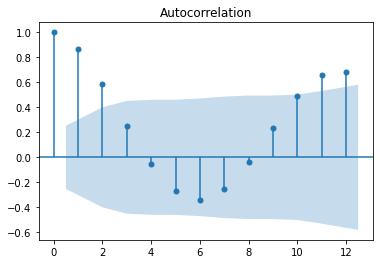

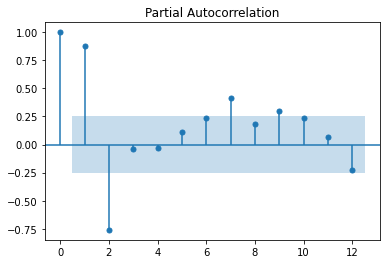

In [25]:
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(plastic.Sales,lags=12)
tsaplots.plot_pacf(plastic.Sales,lags=12)
plt.show()

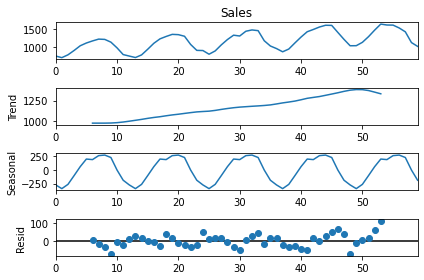

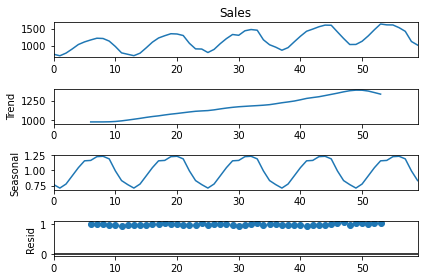

In [26]:
decompose_ts_add = seasonal_decompose(plastic.Sales,model="additive",period=12)
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(plastic.Sales,model="multiplicative",period=12)
decompose_ts_mul.plot()
plt.show()

### MAPE

In [27]:
def MAPE(pred,orig):
    temp=np.abs((pred-orig)/orig)*100
    return np.mean(temp)

In [28]:
train = plastic.head(48)
test = plastic.tail(12)

## Simple Exponential Smoothening

In [29]:
ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Sales)

C:\Users\Aswathy\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


18.181999865809455

## Holt Method

In [30]:
hw_model=Holt(train['Sales']).fit(smoothing_level=0.2)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Sales)

22.316836930824877

### Holt Winter Exponential Smoothing with additive Seasonality and additive Trend

In [31]:
hwe_add_sea_trend_model=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_hwe_add_sea_trend=hwe_add_sea_trend_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_add_sea_trend,test.Sales)

11.72188875957412

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [32]:
hwe_mul_sea_trend_model=ExponentialSmoothing(train.Sales,seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_hwe_mul_sea_trend=hwe_mul_sea_trend_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_mul_sea_trend,test.Sales)

15.051702809941952

## Final Model by combining train and test

In [33]:
hwe_add_sea_trend_model_final=ExponentialSmoothing(plastic.Sales,seasonal='add',trend='add',seasonal_periods=12).fit()
hwe_add_sea_trend_model_final.forecast(10)

60     934.488350
61     880.667052
62     962.668821
63    1117.703970
64    1273.737847
65    1400.063125
66    1425.901498
67    1487.985947
68    1486.205583
69    1433.868695
dtype: float64

# ARIMA Model

In [34]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [35]:
plastic_data=pd.read_csv('PlasticSales.csv',header=0,index_col=0,parse_dates=True)

<AxesSubplot:>

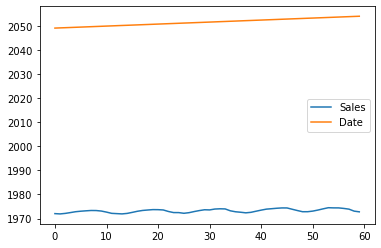

In [36]:
plastic.plot()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

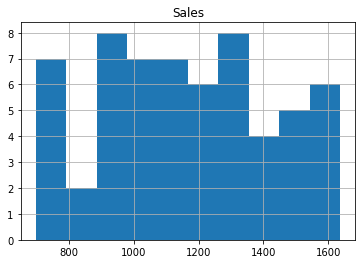

In [37]:
plastic.hist()

<AxesSubplot:ylabel='Density'>

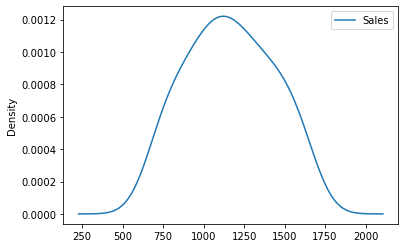

In [38]:
plastic_data.plot(kind='kde')

In [39]:
# Seperate Validation Dataset
split=len(plastic_data)-10
dataset,validation=plastic_data[:split],plastic_data[split:]
print('Dataset %s, Validation %s'% (len(dataset),len(validation)))

Dataset 50, Validation 10


In [40]:
dataset.to_csv('dataset.csv',header=0)
dataset

,Sales
Month,
2049-01-01,742
2049-02-01,697
2049-03-01,776
2049-04-01,898
2049-05-01,1030
2049-06-01,1107
2049-07-01,1165
2049-08-01,1216
2049-09-01,1208


In [41]:
validation.to_csv('validation.csv',header=0)
validation

,Sales
Month,
2053-03-01,1126
2053-04-01,1285
2053-05-01,1468
2053-06-01,1637
2053-07-01,1611
2053-08-01,1608
2053-09-01,1528
2053-10-01,1420
2053-11-01,1119


## Persistance/Base Model

In [42]:
train=pd.read_csv('dataset.csv',header=0,index_col=0,parse_dates=True)
X=train.values
X=X.astype('float')
size=int(len(X)*0.5)
train,test=X[:size],X[size:]

In [43]:
# Walk Forward Validation
history=[x for x in train]
prediction=list()

for i in range(len(test)):
    yhat=history[-1]
    prediction.append(yhat)
    
    obs=test[i]
    history.append(obs)
    print('Predicted %.3f, Expected %.3f'%(yhat,obs))

Predicted 896.000, Expected 793.000
Predicted 793.000, Expected 885.000
Predicted 885.000, Expected 1055.000
Predicted 1055.000, Expected 1204.000
Predicted 1204.000, Expected 1326.000
Predicted 1326.000, Expected 1303.000
Predicted 1303.000, Expected 1436.000
Predicted 1436.000, Expected 1473.000
Predicted 1473.000, Expected 1453.000
Predicted 1453.000, Expected 1170.000
Predicted 1170.000, Expected 1023.000
Predicted 1023.000, Expected 951.000
Predicted 951.000, Expected 861.000
Predicted 861.000, Expected 938.000
Predicted 938.000, Expected 1109.000
Predicted 1109.000, Expected 1274.000
Predicted 1274.000, Expected 1422.000
Predicted 1422.000, Expected 1486.000
Predicted 1486.000, Expected 1555.000
Predicted 1555.000, Expected 1604.000
Predicted 1604.000, Expected 1600.000
Predicted 1600.000, Expected 1403.000
Predicted 1403.000, Expected 1209.000
Predicted 1209.000, Expected 1030.000
Predicted 1030.000, Expected 1032.000


In [44]:
# RMSE Value
rmse=sqrt(mean_squared_error(test,prediction))
rmse

130.24438567554458

## ARIMA Hyperparameters

In [45]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X,arima_order):
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    
    history=[x for x in train]
    prediction=list()
    for t in range(len(test)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit(disp=0)
        yhat=model_fit.forecast()[0]
        prediction.append(yhat)
        history.append(test[t])
        
    # Calculate Error
    rmse=sqrt(mean_squared_error(test,prediction))
    return rmse


In [46]:
## Grid Search for p,d,q values
# evaluate combinations of p,d,q for different ARIMA Models
def evaluate_models(dataset,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=evaluate_arima_model(train,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                    print("ARIMA %s, RMSE= %.3f"%(order,rmse))
                except:
                    continue
    print('Best ARIMA %s, RMSE= %.3f'% (best_cfg,best_score))
    

In [47]:
import warnings
warnings.filterwarnings('ignore')

train=pd.read_csv('dataset.csv',header=0,index_col=0,parse_dates=True,squeeze=True)
# Evaluate Parameters
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)

evaluate_models(train.values,p_values,d_values,q_values)

ARIMA (0, 0, 0), RMSE= 283.039
ARIMA (0, 0, 1), RMSE= 171.460
ARIMA (0, 1, 0), RMSE= 132.035
ARIMA (0, 1, 1), RMSE= 117.584
ARIMA (0, 1, 2), RMSE= 124.317
ARIMA (0, 2, 0), RMSE= 115.662
ARIMA (0, 2, 1), RMSE= 120.126
ARIMA (0, 2, 2), RMSE= 124.549
ARIMA (1, 0, 0), RMSE= 131.164
ARIMA (1, 1, 0), RMSE= 105.039
ARIMA (1, 2, 0), RMSE= 120.149
ARIMA (1, 2, 1), RMSE= 121.534
ARIMA (1, 2, 2), RMSE= 122.684
ARIMA (2, 0, 0), RMSE= 95.600
ARIMA (2, 0, 1), RMSE= 96.134
ARIMA (2, 1, 0), RMSE= 109.977
ARIMA (2, 2, 0), RMSE= 124.127
ARIMA (2, 2, 1), RMSE= 129.916
Best ARIMA (2, 0, 0), RMSE= 95.600


In [48]:
model=ARIMA(X,order=(2,1,0))
model_fit=model.fit()
forecast=model_fit.forecast(10)[0]
forecast

array([1074.10294751, 1111.24271455, 1136.22151472, 1152.50134657,
       1164.31859781, 1174.34942032, 1183.86547126, 1193.33548637,
       1202.87394588, 1212.47648371])

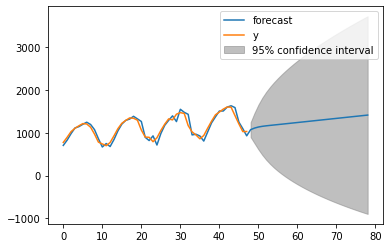

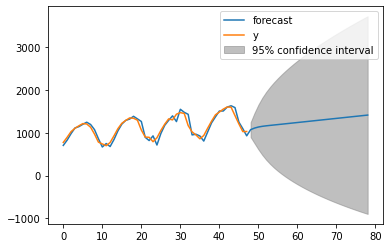

In [49]:
model_fit.plot_predict(1,79)

In [50]:
# Error on test data
val=pd.read_csv('validation.csv',header=None)
valrmse=sqrt(mean_squared_error(val[1],forecast))
rmse

130.24438567554458

In [51]:
X=plastic_data.values
model1=ARIMA(X,order=(2,0,0))
model_fit1=model1.fit()

In [52]:
forecasts=model_fit1.forecast(10)[0]
forecasts

array([ 960.67120308,  960.4656135 , 1000.54136876, 1063.52854017,
       1131.33752754, 1189.0181632 , 1227.0976902 , 1242.26686379,
       1236.65065214, 1216.13520949])

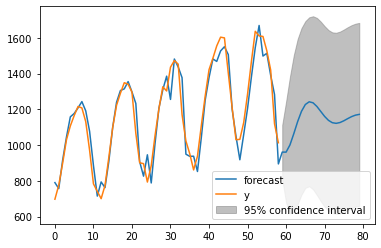

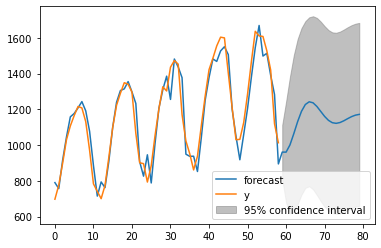

In [53]:
model_fit1.plot_predict(1,80)